## Flower Classification using Fastai

In [1]:
# # Copy into first cell
# from google.colab import drive
# drive.mount('/content/gdrive', force_remount=True)
# root_dir = "/content/gdrive/My Drive/Journey_to_PyTorchFastAI/"

# # Switch to uploaded folder
# import os
# os.chdir('gdrive/My Drive/Journey_to_PyTorchFastAI/')

In [2]:
# !pip install -r requirements.txt

In [3]:
from utils import *

In [4]:
from fastai2.basics import *
from fastai2.vision.all import *
from fastai2.callback.all import *
import matplotlib.pyplot as plt


In [8]:
path = Path('/Users/Pike/Google Drive/Flower_Classification_Visualization/data/flower_data_small')
path

Path('/Users/Pike/Google Drive/Flower_Classification_Visualization/data/flower_data_small')

In [9]:
Path.BASE_PATH = path

In [10]:
path.ls()

(#3) [Path('valid'),Path('.DS_Store'),Path('train')]

In [11]:
(path/"train").ls()

(#11) [Path('train/.DS_Store'),Path('train/9'),Path('train/7'),Path('train/6'),Path('train/1'),Path('train/10'),Path('train/8'),Path('train/4'),Path('train/3'),Path('train/2')...]

In [12]:
train_dir = path/'/train'
valid_dir = path/'/valid'
train_dir, valid_dir

(Path('/train'), Path('/valid'))

In [13]:
flowers = DataBlock(blocks = (ImageBlock, CategoryBlock),
                get_items = get_image_files,
                get_y= parent_label,
                item_tfms = Resize(460),
                batch_tfms=aug_transforms(size=224, min_scale=0.75)
                )

dls = flowers.dataloaders(path, bs = 16,num_workers=0)

In [14]:
imgs,labels = dls.one_batch()
imgs.shape,labels.shape

(torch.Size([16, 3, 224, 224]), torch.Size([16]))

/Users/Pike/opt/anaconda3/lib/python3.7/site-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "


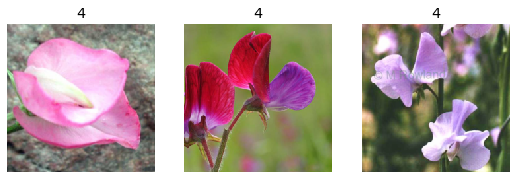

In [15]:
dls.show_batch(nrows=1,ncols =3)

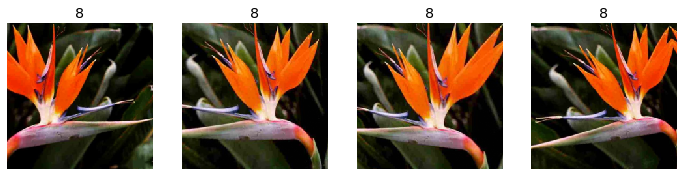

In [16]:
dls.show_batch(nrows=1, ncols = 4, unique=True)

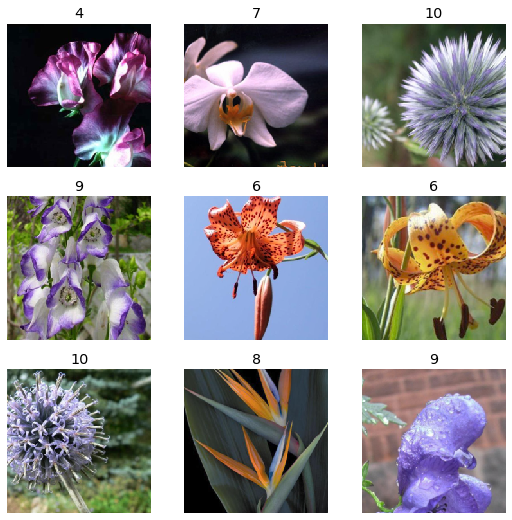

In [17]:
dls.show_batch()

In [18]:
imgs,labels = dls.one_batch()
imgs.shape,labels.shape

(torch.Size([16, 3, 224, 224]), torch.Size([16]))

In [19]:
learn = cnn_learner(dls,vgg16_bn, metrics=error_rate)
learn.model

Sequential(
  (0): Sequential(
    (0): Sequential(
      (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
      (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (5): ReLU(inplace=True)
      (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (9): ReLU(inplace=True)
      (10): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (12): ReLU(inplace=True)
      (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilat

In [20]:
learn.model(imgs).shape

torch.Size([16, 10])

In [ ]:
learn.fit_one_cycle(1,base_lr = 3e-3)

epoch,train_loss,valid_loss,error_rate,time


In [ ]:
%matplotlib inline
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(4,4), dpi=60)

In [ ]:
interp.plot_top_losses(9, figsize=(10,10))